In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("ProjectTweets.csv")

In [3]:
df.columns = ['no','ids', 'date', 'flag', 'user', 'text']
df.head()

,no,ids,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df['text'].nunique()

1581465

19,000 duplicated tweets it looks like. could these be duplicated entries, or simply coincidence and shorter phrases being repeated?

In [7]:
import nltk

import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Language processing/cleaning

In [8]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [9]:
X = df['text']

In [11]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [13]:
df['clean']=pd.DataFrame(cleaned_data)

In [16]:
df['clean'].head()

0    upset updat facebook text might cri result sch...
1    kenichan dive mani time ball manag save rest g...
2                      whole bodi feel itchi like fire
3                        nationwideclass behav mad see
4                                  kwesidei whole crew
Name: clean, dtype: object

In [17]:
df.head()

,no,ids,date,flag,user,text,clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


## VADER

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

In [26]:
dataf=df.head()
dataf

,no,ids,date,flag,user,text,clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


In [29]:
def predict_sentiment(text):
  
  output_dict =  sent.polarity_scores(text)
  return output_dict['compound']

In [30]:
dataf["raw"] = dataf["text"].apply(predict_sentiment)
dataf["processed"] = dataf["clean"].apply(predict_sentiment)

dataf

,no,ids,date,flag,user,text,clean,raw,processed
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,-0.7500,-0.4588
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,0.4939,0.4939
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,-0.2500,0.0258
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see,-0.4939,-0.4939
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew,0.0000,0.0000


note very significant differences in sentiment for certain lines, but no change for others. Some kind of test to determine whether the sentiment is in fact better without the language preprocessing would prove that one approach is better than another, but it would require labelled data, so it will be assumed based on the nature of vader being designed to do it's own preprocessing.

In [31]:
df['VADERsent']=df['text'].apply(predict_sentiment)

In [33]:
df.head(20)

,no,ids,date,flag,user,text,clean,VADERsent
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,-0.7500
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,0.4939
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,-0.2500
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see,-0.4939
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew,0.0000
5,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug,0.4767
6,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see ye rain bit bit lol...,0.6208
7,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana k nope,0.0000
8,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,twittera que muera,0.0000
9,10,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing,spring break plain citi snow,0.0000


## Testing sentiment by user

In [35]:
user_sums = df.groupby('user')['VADERsent'].sum().reset_index()
user_sums = user_sums.sort_values(by='VADERsent', ascending=False)


,user,VADERsent
474340,lost_dog,373.7592
630446,tweetpet,130.3590
233109,VioletsCRUK,120.2078
54918,DarkPiano,110.8859
118008,KevinEdwardsJr,108.3084
629280,tsarnick,90.2419
581622,shanajaca,87.9668
491444,maynaseric,85.7192
15656,AnnSue,78.3826
365231,felicityfuller,76.7003


In [37]:
user_sums.head(20)

,user,VADERsent
474340,lost_dog,373.7592
630446,tweetpet,130.3590
233109,VioletsCRUK,120.2078
54918,DarkPiano,110.8859
118008,KevinEdwardsJr,108.3084
629280,tsarnick,90.2419
581622,shanajaca,87.9668
491444,maynaseric,85.7192
15656,AnnSue,78.3826
365231,felicityfuller,76.7003


In [38]:
user_sums.tail(20)

,user,VADERsent
71978,FeeGigglez,-7.9982
253682,albeitludicrous,-8.1739
455219,ksekher,-8.3538
308139,celesssste,-8.4708
244963,_spell,-9.0727
73547,Fluffy_Cupycake,-9.2518
11164,AlyYvonneG,-10.0384
89396,I_enigma,-10.4425
213482,SunnyInSeattle,-10.5406
60529,Dogbook,-11.2745


it would be impossible to plot the sentiment for all 600,000 users on the same graph in any meaningful way, so the following graphs will give an outline to the shape of the distribution

<function matplotlib.pyplot.show(close=None, block=None)>

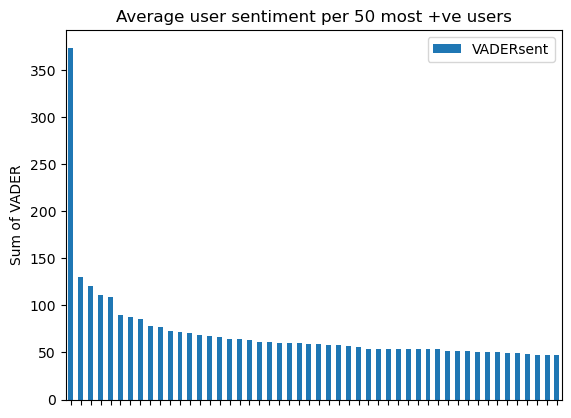

In [70]:
import matplotlib.pyplot as plt
ax = user_sums.head(50).plot(y='VADERsent', kind='bar')
ax.set_xticklabels([])
plt.ylabel('Sum of VADER')
plt.title('Average user sentiment per 50 most +ve users')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

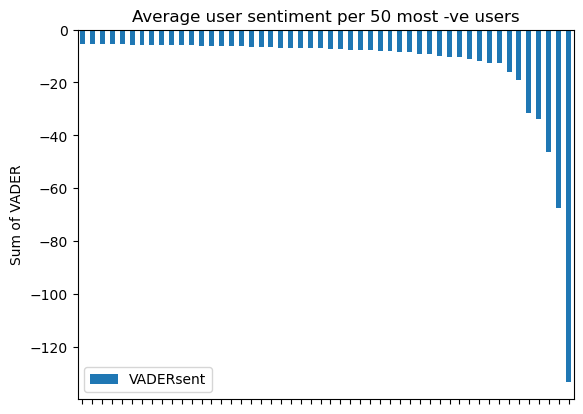

In [71]:
import matplotlib.pyplot as plt
ax = user_sums.tail(50).plot(y='VADERsent', kind='bar')
ax.set_xticklabels([]) 
plt.ylabel('Sum of VADER')
plt.title('Average user sentiment per 50 most -ve users')
plt.show

In [46]:
user_sums['VADERsent'].mean()

0.34995432063961207

In [47]:
df['VADERsent'].mean()

0.144307035129397

so overall it can be seen that the tweets have a slight positive sentiment overall, but there is more of a significant positive slant when sentiment by user is measured. 

In [42]:
df['user'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: user, Length: 659775, dtype: int64

In [45]:
(df['user'] == 'wowlew').sum()

212

so clearly lost_dog is mostly a strongly positive influence on the average sentiment of the dataset, whereas webwoke, with the second most tweets, seems to have a negative influence on the dataset. wowlew has slightly less tweets, but has the most negative influence on the dataset by a significant margin. Out of interest, some of the tweets from these three accounts will be looked at

In [51]:
wowlew = df[df['user'] == 'wowlew']['text']
wowlew.head(50)

99971     isPlayer Has Died! Sorry 
100158    isPlayer Has Died! Sorry 
100203    isPlayer Has Died! Sorry 
100258    isPlayer Has Died! Sorry 
102018    isPlayer Has Died! Sorry 
102131    isPlayer Has Died! Sorry 
102282    isPlayer Has Died! Sorry 
102368    isPlayer Has Died! Sorry 
102465    isPlayer Has Died! Sorry 
102562    isPlayer Has Died! Sorry 
102647    isPlayer Has Died! Sorry 
102779    isPlayer Has Died! Sorry 
102932    isPlayer Has Died! Sorry 
103200    isPlayer Has Died! Sorry 
103318    isPlayer Has Died! Sorry 
103325    isPlayer Has Died! Sorry 
103466    isPlayer Has Died! Sorry 
103596    isPlayer Has Died! Sorry 
103642    isPlayer Has Died! Sorry 
103973    isPlayer Has Died! Sorry 
105320    isPlayer Has Died! Sorry 
105444    isPlayer Has Died! Sorry 
105482    isPlayer Has Died! Sorry 
105637    isPlayer Has Died! Sorry 
119337    isPlayer Has Died! Sorry 
119642    isPlayer Has Died! Sorry 
119718    isPlayer Has Died! Sorry 
119760    isPlayer Has Died!

In [52]:
lost_dog = df[df['user'] == 'lost_dog']['text']
lost_dog.head(50)

43934     @NyleW I am lost. Please help me find a good h...
45573     @SallyD I am lost. Please help me find a good ...
46918     @zuppaholic I am lost. Please help me find a g...
47948     @LOSTPETUSA I am lost. Please help me find a g...
50571     @JeanLevertHood I am lost. Please help me find...
50853     @irenerencsi I am lost. Please help me find a ...
55095     @adevenish I am lost. Please help me find a go...
55655     @LAmale I am lost. Please help me find a good ...
60807     @bthenextstep I am lost. Please help me find a...
64296     @DonaldDonnyDon I am lost. Please help me find...
66591     @christinebrewer I am lost. Please help me fin...
66853     @Cara I am lost. Please help me find a good ho...
67145     @becca_greenberg I am lost. Please help me fin...
67308     @unaverage_joe I am lost. Please help me find ...
67836     @Papadoc1 I am lost. Please help me find a goo...
69349     @LadyHilary I am lost. Please help me find a g...
71122     @KayParx I am lost. Please hel

In [53]:
webwoke = df[df['user'] == 'webwoke']['text']
webwoke.head(50)

363302                   auchh, drop by 1  (32)elitestv.com
366528                      auchh, drop by 1  (7)pedeee.com
366529                   auchh, drop by 1  (17)rumahabi.com
366596                    auchh, drop by 1  (18)twitter.com
366598                      auchh, drop by 1  (19)yehia.org
366600                     auchh, drop by 1  (20)reddit.com
366676               auchh, drop by 1  (21)blogtopsites.com
366678                auchh, drop by 1  (22)blogcatalog.com
366679       auchh, drop by 1  (23)sulumitsretsambew-id.com
366743                  auchh, drop by 1  (24)slideboom.com
366745              auchh, drop by 1  (26)tribbleagency.com
366817             auchh, drop by 1  (27)alexasalsabila.com
366818                  auchh, drop by 1  (28)renantech.com
366822                   auchh, drop by 1  (29)buzzfeed.com
379603             damn... drop by 1  17. tareeinternet.com
379604                    damn... drop by 1  18. reddit.com
379648                 aughh... drop by 

it seems like these are all bots of various kinds that autopost tweets based on other users interactions or something else. They are of less interest than previously considered. also worth noting that while they contribute more than other tweets to the average sentiment, contributing (in the most case) 500 tweets in a set of 1,600,000 is not that significant.

# Sentiment by HOUR
1. seperate out hourly values
2. get average (sum?) sentiment by hour
3. create dataset with all hour values
4. merge the 2 datasets on the hours column
5. Investigate... is it worth imputing here in some way? is there skew due to daily sentiment distribution?

### prepare df_hour

In [72]:
hour_range = pd.date_range(start = '2009-04-06 00:00:00',end = '2009-06-25 00:00:00', freq = 'H')
hour_range

DatetimeIndex(['2009-04-06 00:00:00', '2009-04-06 01:00:00',
               '2009-04-06 02:00:00', '2009-04-06 03:00:00',
               '2009-04-06 04:00:00', '2009-04-06 05:00:00',
               '2009-04-06 06:00:00', '2009-04-06 07:00:00',
               '2009-04-06 08:00:00', '2009-04-06 09:00:00',
               ...
               '2009-06-24 15:00:00', '2009-06-24 16:00:00',
               '2009-06-24 17:00:00', '2009-06-24 18:00:00',
               '2009-06-24 19:00:00', '2009-06-24 20:00:00',
               '2009-06-24 21:00:00', '2009-06-24 22:00:00',
               '2009-06-24 23:00:00', '2009-06-25 00:00:00'],
              dtype='datetime64[ns]', length=1921, freq='H')

In [73]:
df_hour = pd.DataFrame({'HOUR': hour_range})
df_hour

,HOUR
0,2009-04-06 00:00:00
1,2009-04-06 01:00:00
2,2009-04-06 02:00:00
3,2009-04-06 03:00:00
4,2009-04-06 04:00:00
...,...
1916,2009-06-24 20:00:00
1917,2009-06-24 21:00:00
1918,2009-06-24 22:00:00
1919,2009-06-24 23:00:00


### hourly sentiment

In [76]:
df['date'].head()

0    Mon Apr 06 22:19:49 PDT 2009
1    Mon Apr 06 22:19:53 PDT 2009
2    Mon Apr 06 22:19:57 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:20:00 PDT 2009
Name: date, dtype: object

In [77]:
df['date'] = pd.to_datetime(df['date'])

In [78]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [79]:
df['HOUR'] = df['date'].dt.strftime('%Y-%m-%d %H')

I think aggregate sentiment for different values will be interesting to look at as we go, so I'm going to find that as well. really it's just mean x tweetcount.

In [83]:
hourly_sent = df.groupby('HOUR')['VADERsent'].agg(['mean', 'sum']).reset_index()
hourly_sent.head(10)

,HOUR,mean,sum
0,2009-04-06 22,0.134211,181.4537
1,2009-04-06 23,0.162768,326.6751
2,2009-04-07 00,0.172995,335.6109
3,2009-04-07 01,0.171917,335.2379
4,2009-04-07 02,0.179346,339.3227
5,2009-04-07 03,0.161956,317.5952
6,2009-04-07 04,0.168546,335.7439
7,2009-04-07 05,0.166031,331.3973
8,2009-04-07 06,0.161723,318.2712
9,2009-04-07 07,0.158676,310.3712


In [102]:
hourly_sent

,HOUR,mean,sum
0,2009-04-06 22:00:00,0.134211,181.4537
1,2009-04-06 23:00:00,0.162768,326.6751
2,2009-04-07 00:00:00,0.172995,335.6109
3,2009-04-07 01:00:00,0.171917,335.2379
4,2009-04-07 02:00:00,0.179346,339.3227
...,...,...,...
588,2009-06-25 06:00:00,-0.038586,-79.2937
589,2009-06-25 07:00:00,-0.040628,-86.2122
590,2009-06-25 08:00:00,-0.050696,-100.0745
591,2009-06-25 09:00:00,-0.056881,-118.0845


so I'm going to look at this as is and then merge it for the whole time scale.
below is odd graph number 1.

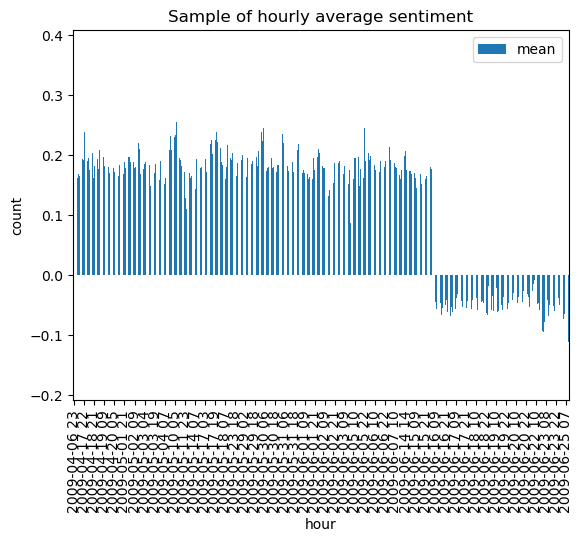

In [87]:
hourly_sent.plot(x='HOUR', y = 'mean',kind='bar')

x_ticks = range(1, len(hourly_sent) + 1, 12)
plt.xticks(x_ticks, hourly_sent['HOUR'].iloc[x_ticks])
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Sample of hourly average sentiment')
plt.show()

<Figure size 1600x600 with 0 Axes>

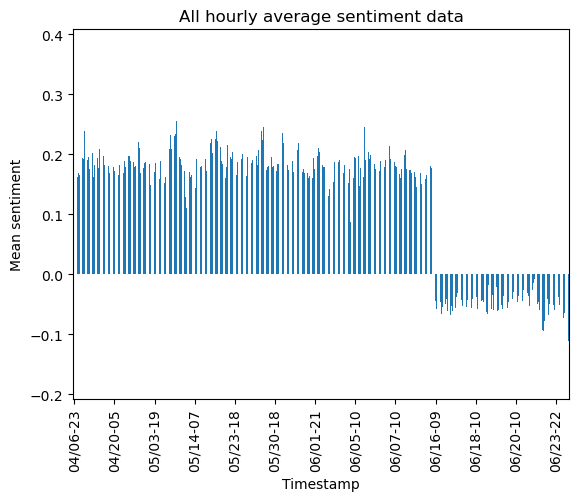

In [158]:
plt.figure(figsize=(16, 6))
hourly_sent.plot('HOUR', 'mean',kind = 'bar')
x_ticks = range(1, len(hourly_sent), 48)
x_labels = [timestamp.strftime('%m/%d-%H') for timestamp in hourly_sent['HOUR'].iloc[x_ticks]]
plt.xticks(x_ticks, x_labels)
plt.legend().set_visible(False)
plt.xlabel('Timestamp')
plt.ylabel('Mean sentiment')
plt.title('All hourly average sentiment data')
plt.savefig('no space added.png', dpi=300, bbox_inches='tight')
plt.show()

### combine df hour and average sentiment

In [91]:
hourly_sent['HOUR']=pd.to_datetime(hourly_sent['HOUR'], format='%Y-%m-%d %H')
type(hourly_sent['HOUR'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [93]:
hour_range = df_hour.merge(hourly_sent, how='left', on='HOUR')
hour_range.fillna(0, inplace=True)
hour_range

,HOUR,mean,sum
0,2009-04-06 00:00:00,0.000000,0.0000
1,2009-04-06 01:00:00,0.000000,0.0000
2,2009-04-06 02:00:00,0.000000,0.0000
3,2009-04-06 03:00:00,0.000000,0.0000
4,2009-04-06 04:00:00,0.000000,0.0000
...,...,...,...
1916,2009-06-24 20:00:00,-0.179868,-17.8069
1917,2009-06-24 21:00:00,-0.046330,-97.5237
1918,2009-06-24 22:00:00,-0.038609,-80.5773
1919,2009-06-24 23:00:00,-0.050539,-101.4819


In [96]:
def zoom(start,end,hours):
    sample = hour_range.iloc[start:end]
    X ='HOUR'
    Y = 'mean'
    sample.plot(x = X, y = Y, kind='bar')
    x_ticks = range(1, len(sample) + 1, hours)
    plt.xticks(x_ticks, sample['HOUR'].iloc[x_ticks])
    plt.xlabel('Date & Hour')
    plt.ylabel('Mean sentiment')
    plt.title('Sample of hourly sentiment ')
    plt.show()
    return 0

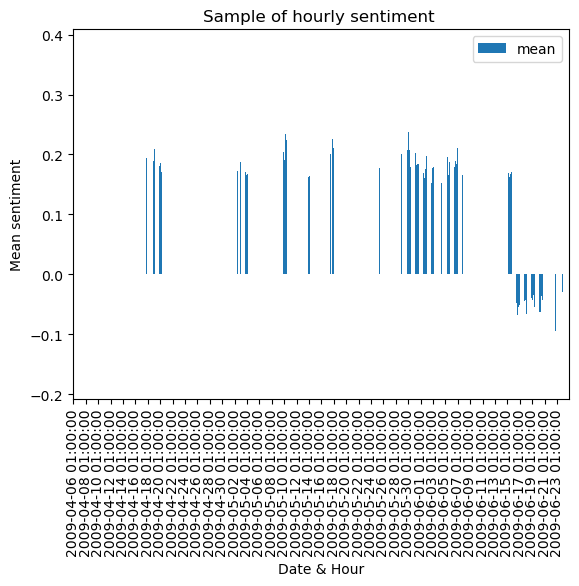

0

In [138]:
zoom(0,1920,48)

<Figure size 1600x600 with 0 Axes>

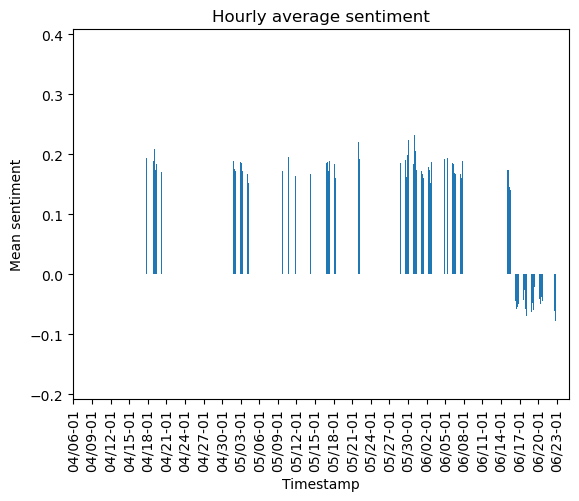

In [161]:
plt.figure(figsize=(16, 6))
hour_range.plot('HOUR', 'mean',kind = 'bar')
x_ticks = range(1, len(hour_range), 72)
x_labels = [timestamp.strftime('%m/%d-%H') for timestamp in hour_range['HOUR'].iloc[x_ticks]]
plt.xticks(x_ticks, x_labels)
plt.legend().set_visible(False)
plt.xlabel('Timestamp')
plt.ylabel('Mean sentiment')
plt.title('Hourly average sentiment')
plt.savefig('high_resolution_graph.png', dpi=500, bbox_inches='tight')
plt.show()

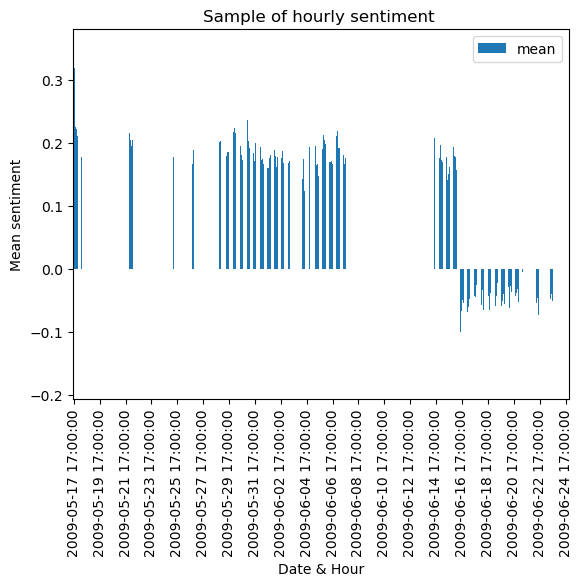

0

In [132]:
zoom(1000,1920,48)

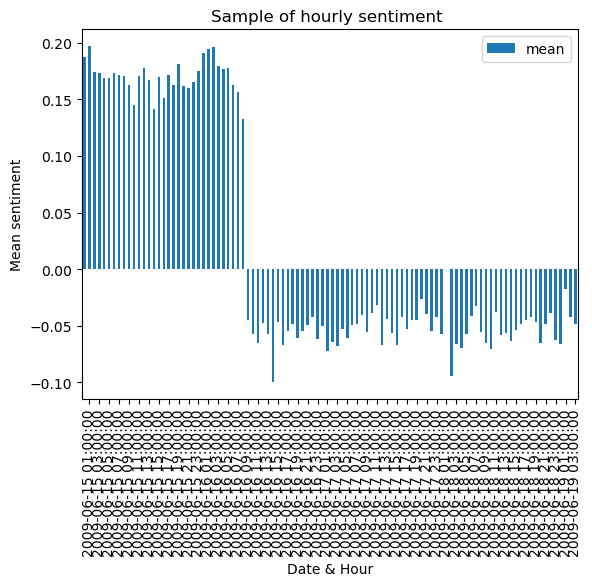

0

In [110]:
zoom(1680,1780,2)

## "Is there any daily cycle for hourly sentiment?"
1. group by hour and separate the two domains of +ve and -ve 

In [111]:
hourly_sent['justhour']=hourly_sent['HOUR'].dt.strftime('%H')
hourly_sent

,HOUR,mean,sum,justhour
0,2009-04-06 22:00:00,0.134211,181.4537,22
1,2009-04-06 23:00:00,0.162768,326.6751,23
2,2009-04-07 00:00:00,0.172995,335.6109,00
3,2009-04-07 01:00:00,0.171917,335.2379,01
4,2009-04-07 02:00:00,0.179346,339.3227,02
...,...,...,...,...
588,2009-06-25 06:00:00,-0.038586,-79.2937,06
589,2009-06-25 07:00:00,-0.040628,-86.2122,07
590,2009-06-25 08:00:00,-0.050696,-100.0745,08
591,2009-06-25 09:00:00,-0.056881,-118.0845,09


In [112]:
just_pve = hourly_sent[hourly_sent['mean']>0]
just_nve = hourly_sent[hourly_sent['mean']<0]

### Positive domain

In [184]:
just_pve.shape

(433, 4)

In [129]:
phour_count = just_pve['justhour'].value_counts()
phour_count = pd.DataFrame(phour_count)
phour_count = phour_count.sort_index()
phour_count

,justhour
00,22
01,22
02,22
03,21
04,21
05,20
06,21
07,23
08,23
09,18


In [172]:
phour_count = pd.DataFrame(phour_count)
phour_count

,justhour
00,22
01,22
02,22
03,21
04,21
05,20
06,21
07,23
08,23
09,18


<AxesSubplot:>

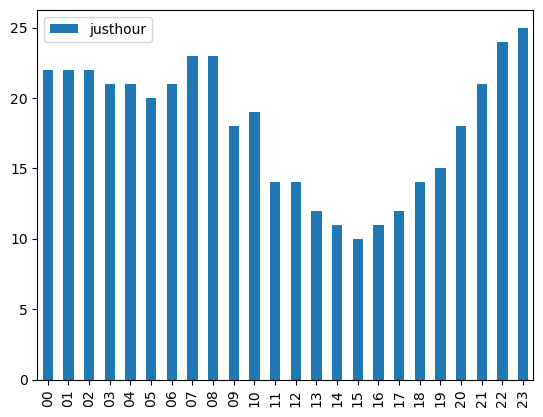

In [130]:
phour_count.plot(kind = 'bar')

In [186]:
pve_hourly = just_pve.groupby('justhour')['mean'].agg(['mean']).reset_index()
pve_hourly

,justhour,mean
0,00,0.198039
1,01,0.195899
2,02,0.196549
3,03,0.191475
4,04,0.188643
5,05,0.184052
6,06,0.178715
7,07,0.178666
8,08,0.184249
9,09,0.183452


<AxesSubplot:>

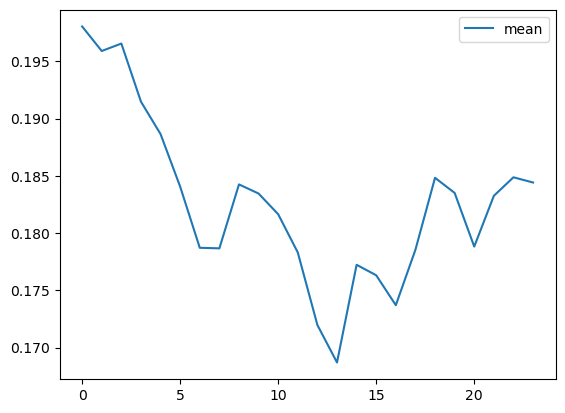

In [187]:
pve_hourly.plot(kind='line')

In [188]:
pve_hourly.describe()

,mean
count,24.000000
mean,0.182744
std,0.007457
min,0.168701
25%,0.178484
50%,0.183352
75%,0.184837
max,0.198039


To get an estimate of the affect of the sampling on the mean, we will multiply the mean for each hour vs the relative frequency and then multiply the mean for each hour vs an even sample for the frequency

In [189]:
phour_count = just_pve['justhour'].value_counts()
phour_count = phour_count.sort_index()
phour_count = pd.DataFrame({'Category': phour_count.index, 'Count': phour_count.values})
phour_count
#pve_hourly['count'] = just_pve['justhour'].value_counts()
pve_hourly['even_sampling']=pve_hourly['mean']*(25/433)*100
pve_hourly['actual_sampling']=pve_hourly['mean']*(phour_count['Count']/433)*100
pve_hourly


,justhour,mean,even_sampling,actual_sampling
0,00,0.198039,1.143414,1.006204
1,01,0.195899,1.131055,0.995329
2,02,0.196549,1.134811,0.998633
3,03,0.191475,1.105514,0.928632
4,04,0.188643,1.089163,0.914897
5,05,0.184052,1.062657,0.850126
6,06,0.178715,1.031844,0.866749
7,07,0.178666,1.031558,0.949033
8,08,0.184249,1.063795,0.978691
9,09,0.183452,1.059190,0.762617


In [190]:
sample_mean = pve_hourly['actual_sampling'].sum()/24
actual_mean = pve_hourly['even_sampling'].sum()/24
sample_mean, actual_mean

(0.7665174315128293, 1.0551024923520884)

Firstly, the hourly spread is notably not even, with fewer hours between of 11am and 7pm PST being included than other hours.
Secondly, an hourly fluctuation has been found of about 16%.
Assuming they represent the actual patterns of the daily tweet sentiment that will be imputed and that the missing hours are missing at random, these findings show a bias in the data towards containing hours that have slightly higher average sentiment. This will result in daily average values skewing higher than they would be were they not missing any hours. As a result, imputation methods should 

### Negative domain

In [162]:
nhour_count = just_nve['justhour'].value_counts()
nhour_count = pd.DataFrame(nhour_count)
nhour_count = nhour_count.sort_index()
nhour_count

,justhour
00,6
01,5
02,6
03,6
04,6
05,6
06,6
07,7
08,7
09,8


<AxesSubplot:>

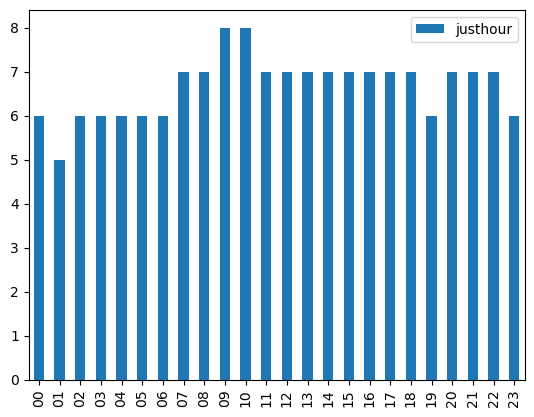

In [163]:
nhour_count.plot(kind = 'bar')

In [164]:
nve_hourly = just_nve.groupby('justhour')['mean'].agg(['mean']).reset_index()
nve_hourly

,justhour,mean
0,00,-0.051936
1,01,-0.044191
2,02,-0.057871
3,03,-0.047929
4,04,-0.053374
5,05,-0.057486
6,06,-0.038865
7,07,-0.042896
8,08,-0.041522
9,09,-0.048911


<AxesSubplot:>

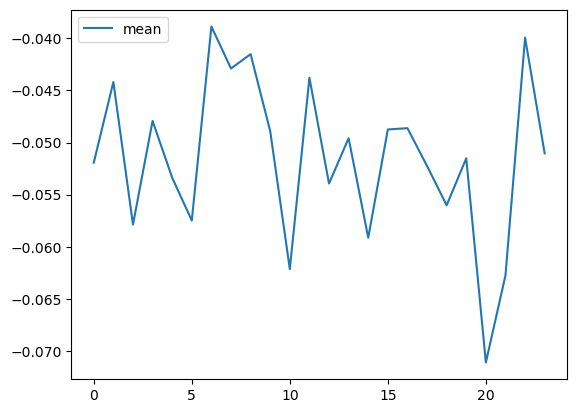

In [191]:
nve_hourly.plot(kind='line')

# Sentiment by DAY
1. seperate out daily values
2. get average (sum?) sentiment by day
3. create dataset with all hour values
4. merge the 2 datasets on the hours column


In [80]:
df['DATE'] =df['date'].dt.date

In [81]:
type(df['DATE'][0])

datetime.date